<a href="https://colab.research.google.com/github/anhnguyen1204/anhnguyen/blob/main/Loan_Status_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
I, IMPORT LIBRARY AND DATA
```



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

loan_df = pd.read_csv("/content/train_loan.csv")


II, GENERAL INFORMATION

In [5]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
loan_df.head()

,loan_id,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
loan_df.duplicated().sum()

0

In [21]:
loan_df.columns = [col.lower() for col in loan_df.columns]
columns = loan_df.columns

for col in columns:
    missing_percent = loan_df[col].isna().sum()/loan_df.shape[0]*100
    if missing_percent>0:
        print(f'Column {col} has {missing_percent:.2f}% missing values')

Column gender has 2.12% missing values
Column married has 0.49% missing values
Column dependents has 2.44% missing values
Column self_employed has 5.21% missing values
Column loanamount has 3.58% missing values
Column loan_amount_term has 2.28% missing values
Column credit_history has 8.14% missing values


II, DATA CLEANING

In [15]:
loan_df['gender'].fillna(loan_df['gender'].mode()[0], inplace=True)

In [22]:
#Check married status due to education status
print(loan_df.groupby('education')['married'].value_counts())


education     married
Graduate      Yes        309
              No         168
Not Graduate  Yes         89
              No          45
Name: count, dtype: int64


In [23]:
loan_df['married'].fillna(loan_df['married'].mode()[0], inplace = True)
loan_df['dependents'].fillna(loan_df['dependents'].mode()[0], inplace = True)

In [ ]:
print(loan_df.groupby('education')['self_employed'].value_counts())

loan_df['self_employed'].fillna('No', inplace= True)

education     self_employed
Graduate      No               389
              Yes               65
Not Graduate  No               111
              Yes               17
Name: self_employed, dtype: int64


In [24]:
#Change data type of credit_history
loan_df['credit_history'] = loan_df['credit_history'].astype('category')
loan_df['credit_history'].fillna(loan_df['credit_history'].mode()[0], inplace= True)

In [25]:
#Handle outliers

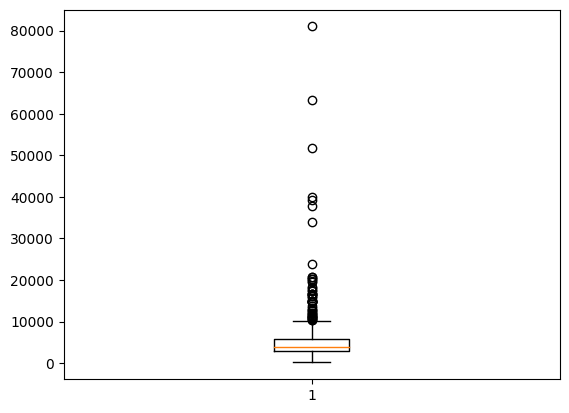

In [26]:
plt.boxplot(loan_df['applicantincome'])
plt.show()

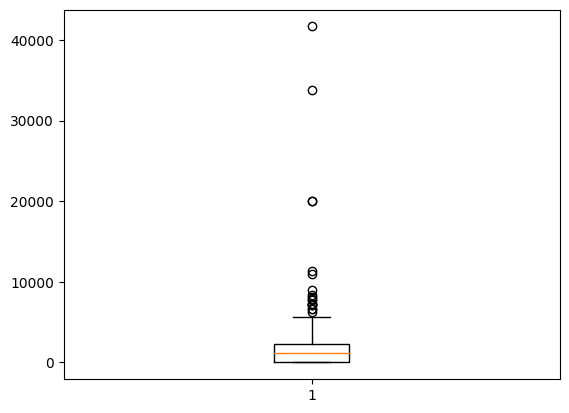

In [27]:
plt.boxplot(loan_df['coapplicantincome'])
plt.show()

In [28]:
loan_df.drop(loan_df['applicantincome'][loan_df['applicantincome']>25000].index, inplace=True)
loan_df.drop(loan_df['coapplicantincome'][loan_df['coapplicantincome']>10000].index, inplace=True)
#drop redundant columns
loan_df.drop('loan_id',axis=1, inplace=True)


III, DATA PREPROCESSING

In [29]:
X = loan_df.iloc[:,:-1].values
y = loan_df.iloc[:,-1].values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values= np.nan, strategy= 'mean')
imputer.fit(X[:,5:9])
X[:,5:9] = imputer.transform(X[:,5:9])

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers =[('encoder', OneHotEncoder(),[0,1,2,3,4,9,10])], remainder = 'passthrough')
X = ct.fit_transform(X)


In [31]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

In [33]:
from sklearn.model_selection import train_test_split
X_train , X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:,5:9] = sc.fit_transform(X_train[:,5:9])

IV, , MACHINE LEARNING TO PREDICT LOAN STATUS

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix
log_reg  = LogisticRegression(solver = 'liblinear',max_iter=1000)

log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)
precision_score(y_test, y_pred), recall_score(y_test, y_pred)


(0.7837837837837838, 0.9775280898876404)

In [36]:
poly = PolynomialFeatures(degree=1)
poly_features_X_train = poly.fit_transform(X_train)
poly_features_X_test = poly.transform(X_test)
poly_log_reg = LogisticRegression(solver ='liblinear',max_iter=1000)
poly_log_reg.fit(poly_features_X_train,y_train)
poly_log_reg.score(poly_features_X_test,y_test)

0.7851239669421488

In [37]:
decision_tree=  DecisionTreeClassifier(criterion='entropy',max_depth=5)
decision_tree.fit(X_train, y_train)
decision_tree.score(X_test,y_test)

0.7851239669421488

In [38]:
from sklearn.model_selection import cross_val_score
log_reg_cv = LogisticRegression(solver = 'liblinear',max_iter=1000)
dt_cv = DecisionTreeClassifier(criterion='entropy',max_depth=8,random_state=2022)
lr_scores = cross_val_score(log_reg_cv,X,y,scoring = 'accuracy',cv = 5)
lr_scores.mean(), lr_scores.std()

(0.8136363636363637, 0.028716018764805153)

In [39]:
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier, AdaBoostClassifier
seed =2023
models = [LinearSVC(max_iter = 120000, random_state=seed),
          SVC(random_state=seed),
          KNeighborsClassifier(metric ='minkowski',p = 2),
          LogisticRegression(solver ='liblinear',max_iter = 1000),
          DecisionTreeClassifier(random_state=seed),
          RandomForestClassifier(random_state=seed),
          ExtraTreesClassifier(),
          AdaBoostClassifier()]

In [40]:
from sklearn.model_selection import StratifiedKFold
def generate_baseline_results(models, X, y, metrics, cv = 5 , plot_results = False):
    kfold = StratifiedKFold(cv,shuffle=True,random_state=seed)
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        scores = cross_val_score(model, X, y, scoring = metrics, cv = kfold)
        for fold_idx, score in enumerate(scores):
            entries.append((model_name,fold_idx,score))
    cv_df = pd.DataFrame(entries,columns =['model_name','fold_id','accuracy_score'])
    if plot_results:
        sns.boxplot(x = 'model_name',y ='accuracy_score',data = cv_df,color = 'lightblue',showmeans=True)
        plt.xticks(rotation=45)
        plt.show()
    mean = cv_df.groupby('model_name')['accuracy_score'].mean()
    std = cv_df.groupby('model_name')['accuracy_score'].std()
    baseline_result = pd.concat([mean,std],axis= 1, ignore_index= True)
    baseline_result.columns =['Mean','Standard Deviation']
    baseline_result.sort_values(by = ['Mean'],ascending= False, inplace = True)
    return baseline_result

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


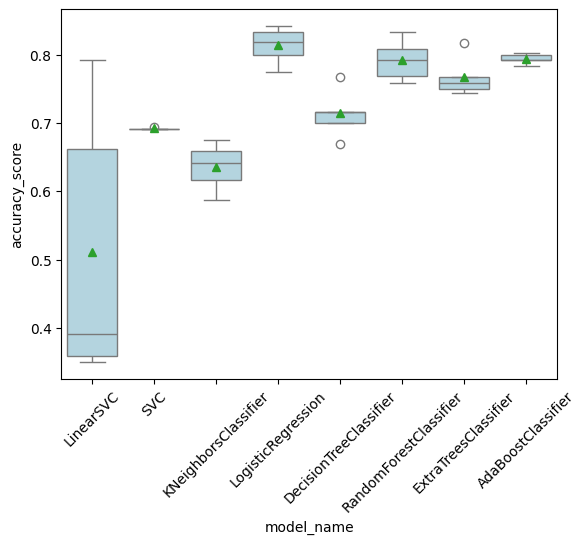

,Mean,Standard Deviation
model_name,,
LogisticRegression,0.813636,0.026800
AdaBoostClassifier,0.793664,0.007394
RandomForestClassifier,0.792052,0.030235
ExtraTreesClassifier,0.767094,0.029022
DecisionTreeClassifier,0.713884,0.035253
SVC,0.692176,0.001140
KNeighborsClassifier,0.635689,0.034814
LinearSVC,0.510565,0.202971


In [41]:
generate_baseline_results(models,X,y,metrics='accuracy',cv =5,plot_results=True)